In [69]:
# Cell 1: Import necessary libraries
import numpy as np
from scipy.io import wavfile
import os
import matplotlib.pyplot as plt
from pydub import AudioSegment
import zipfile

We first import the necessary libraries. We will use numpy and scipy for the Fourier Transform, os for file operations, matplotlib for plotting, pydub for converting MP3 to WAV, and zipfile for extracting zip files.

In [70]:
# Cell 3: Define necessary functions
def extract_zip_files(zip_file, extract_dir):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

def convert_mp3_to_wav(mp3_file):
    audio = AudioSegment.from_mp3(mp3_file)
    wav_file = mp3_file.replace('.mp3', '.wav')
    audio.export(wav_file, format='wav')
    return wav_file

def get_frequency_response(wav_file):
    # Read file
    sample_rate, data = wavfile.read(wav_file)
    # If the audio file has two channels, get their average
    if data.ndim == 2:
        data = np.mean(data, axis=1)
    # Perform Fourier Transform
    frequencies = np.fft.rfftfreq(data.size, d=1./sample_rate)
    amplitudes = np.abs(np.fft.rfft(data)/data.size)
    return frequencies, amplitudes

We define three functions: `extract_zip_files` to extract all files from a zip file, `convert_mp3_to_wav` to convert MP3 files to WAV format, and `get_frequency_response` to perform Fourier Transform on a WAV file and return the frequencies and their corresponding amplitudes.

In [71]:
ZIP_PATH = "data/audio_samples.zip"
TMP_PATH = ".tmp/"

# Loop through each zip file
extract_zip_files(ZIP_PATH, TMP_PATH)

audio_files = [f for f in os.listdir(TMP_PATH) if f.endswith('.mp3')]

We visualize the frequency response of different headphones under various test settings. 

The first cell defines the colors that will be used for each headphone in the plots. 

The second cell does the following:
1. It loops through each test setting in the data dictionary. For each test setting, it initializes a new figure and axes.
2. It sorts the headphone names and then loops through each headphone in the test setting.
3. For each headphone, it plots the frequency response data (frequencies and amplitudes) on the figure and adds a legend for the headphone. The x-axis is set to a logarithmic scale, and the x-axis and y-axis limits are set. Y-axis ticks are set at 20 intervals, and dotted grid lines are added at y-axis ticks.
4. It sets the title of the figure as 'Frequency response of {test_setting}', labels the x-axis as 'Frequency [Hz]', and labels the y-axis as 'Amplitude'.
5. Finally, it displays the plot using `plt.show()`.

This visualization helps us compare the frequency responses of different headphones under the same test setting.

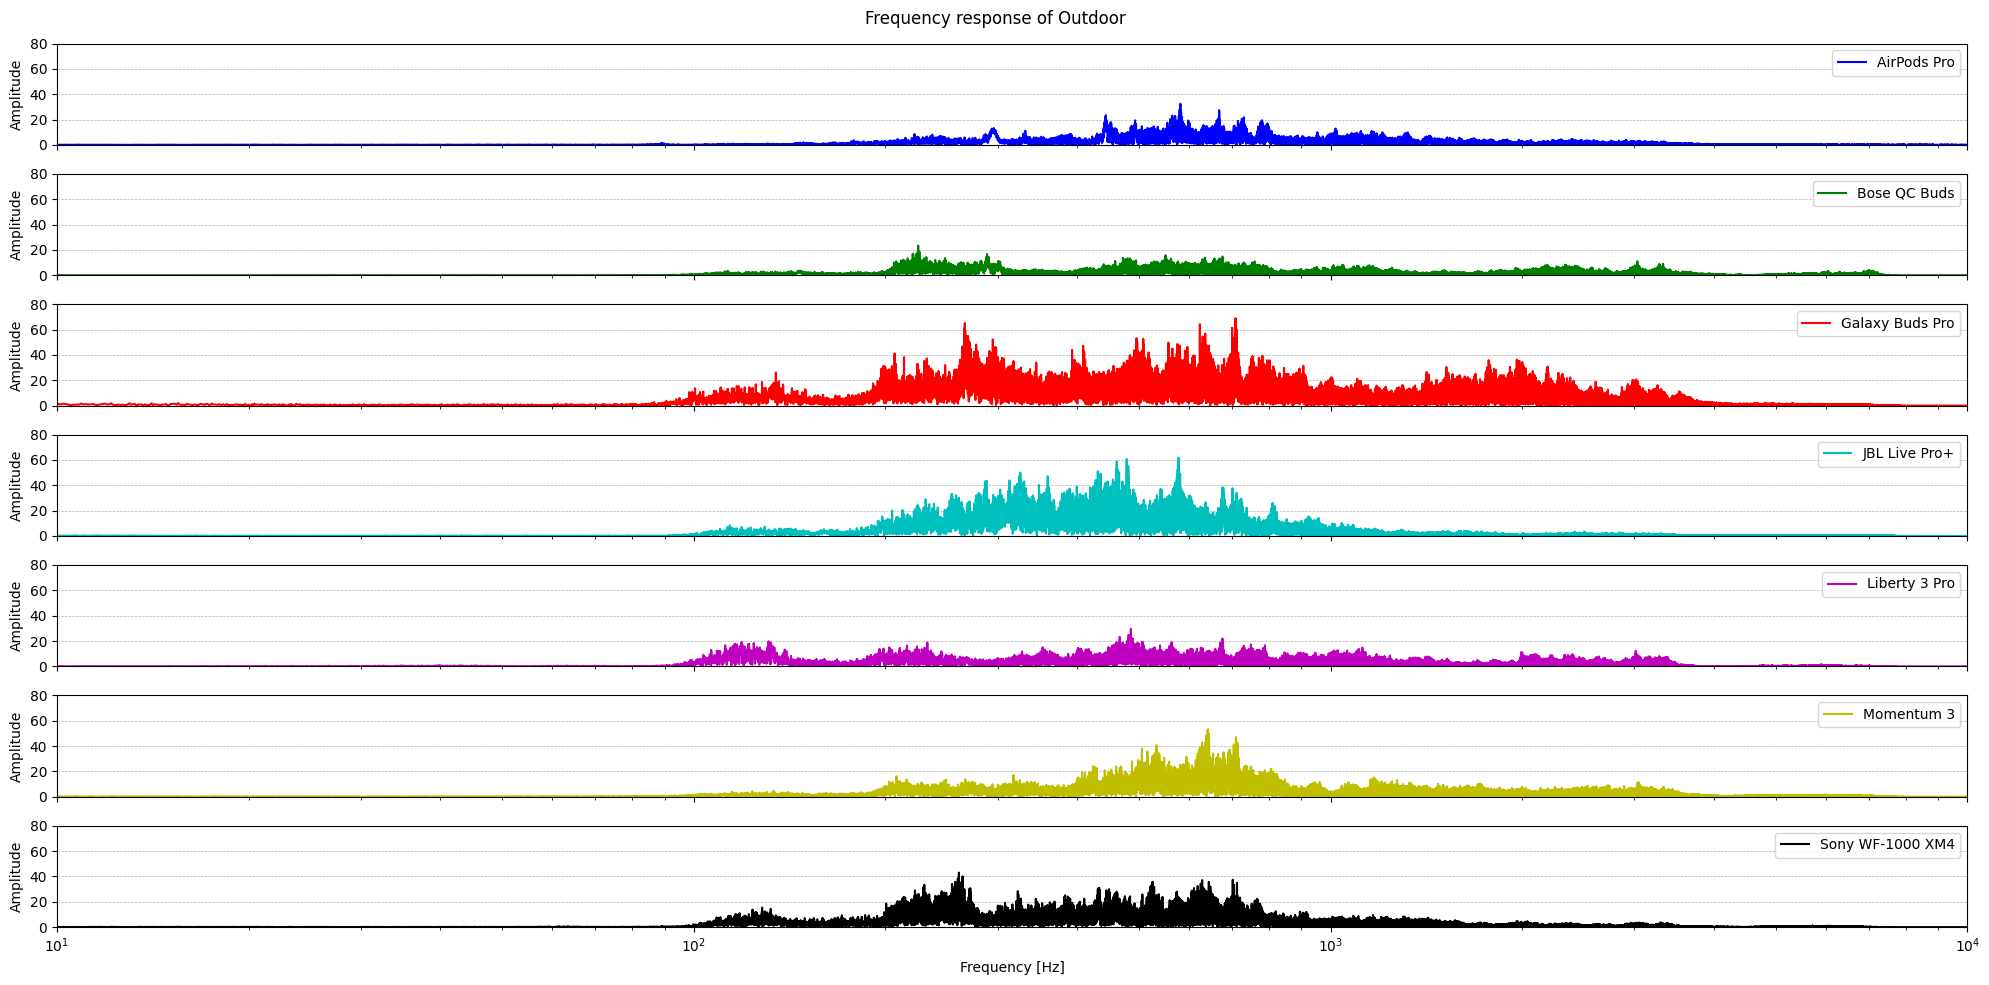

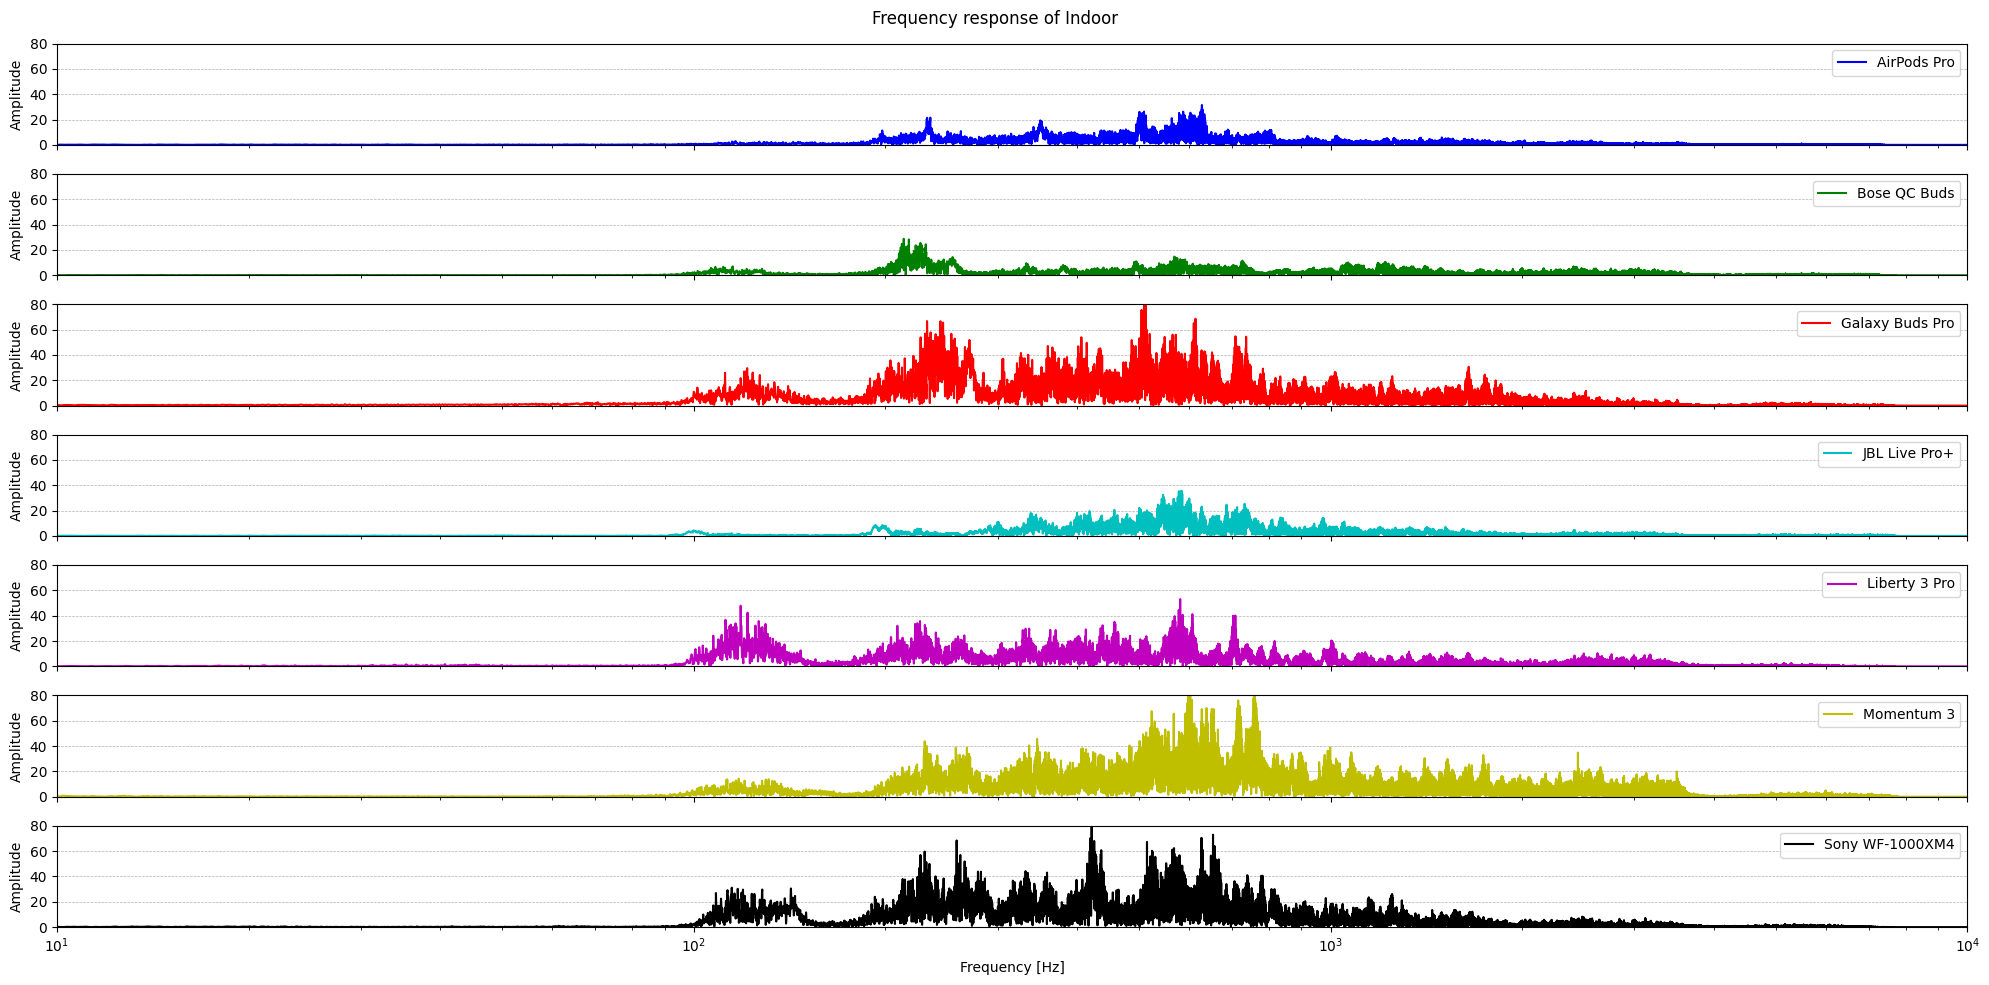

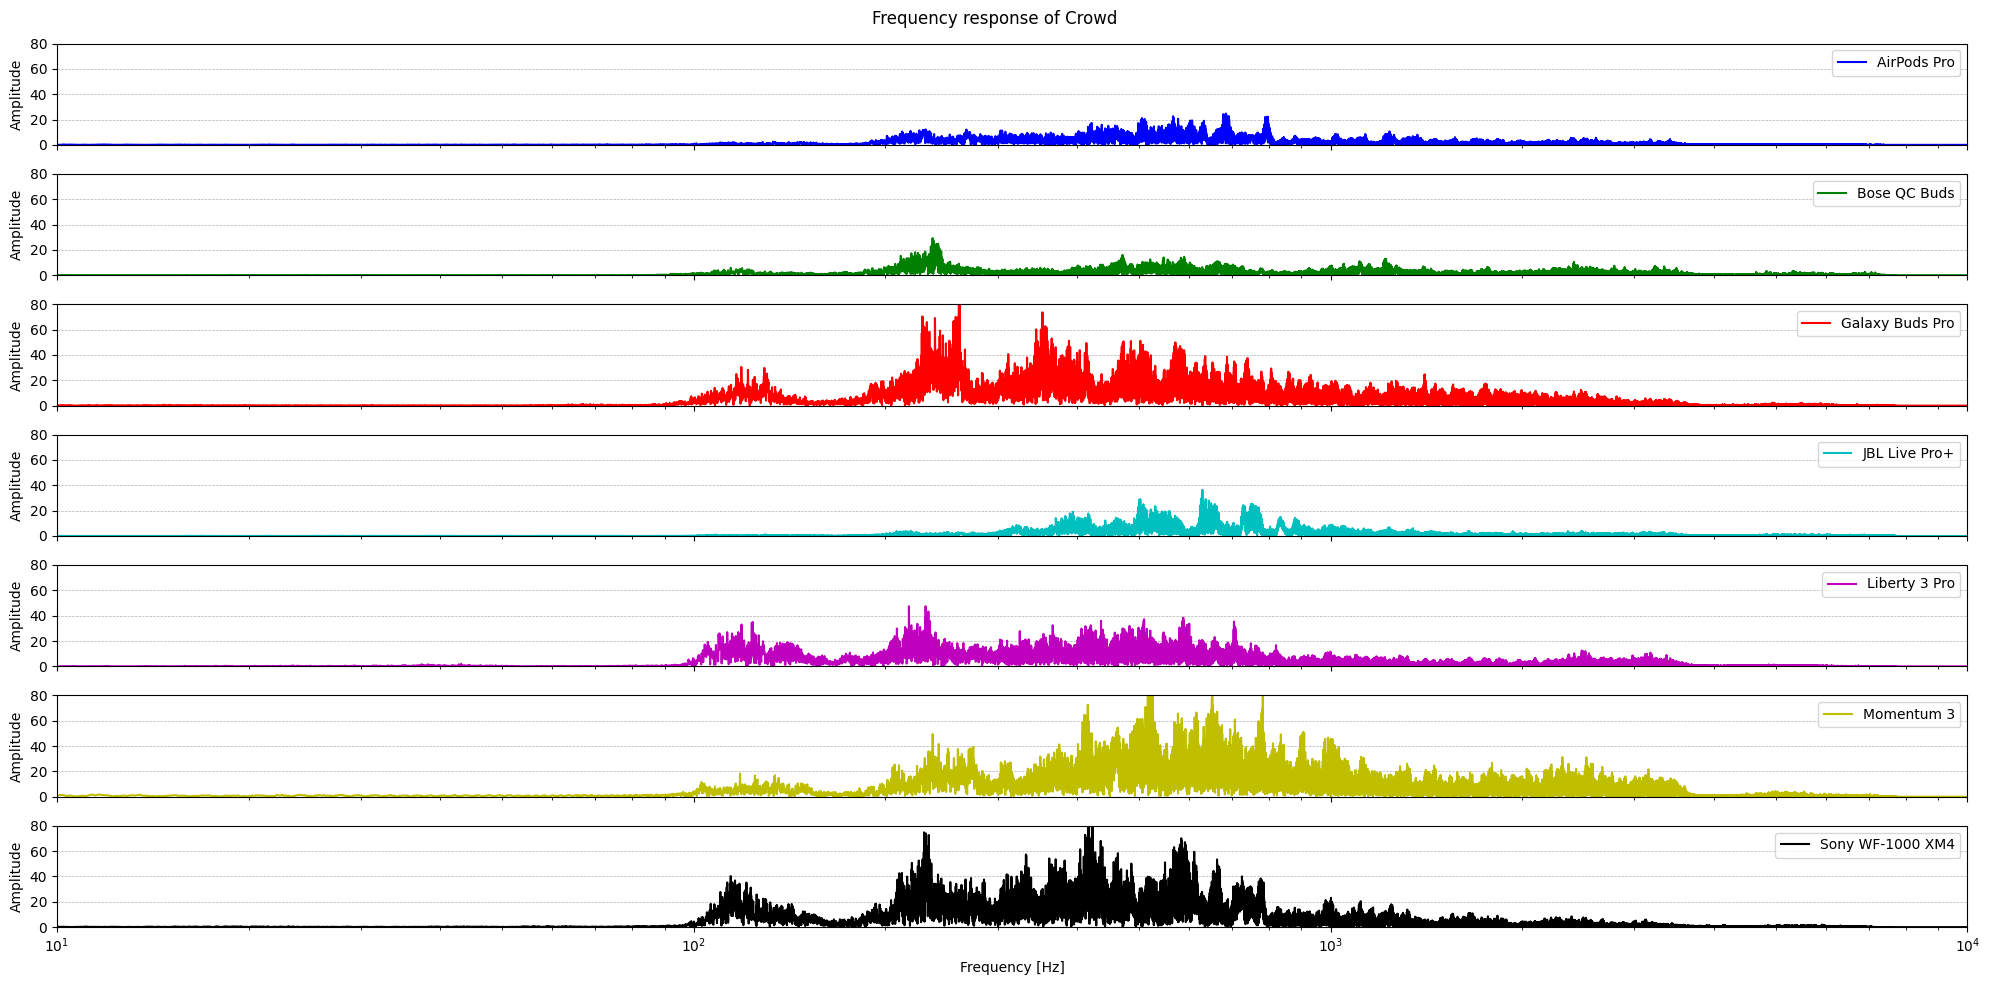

In [72]:
from matplotlib.ticker import MaxNLocator

# Define the colors for each headphone
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Replace with the actual colors

# After processing all files, loop through each test setting in the dictionary
for test_setting, headphones in data.items():
    # Initialize a new figure and axes for the test setting
    fig, axs = plt.subplots(nrows=7, sharex=True, sharey=True, figsize=(20, 10))
    
    # Sort headphone names
    sorted_headphones = sorted(headphones.items(), key=lambda x: x[0])
    
    # Loop through each headphone in the test setting
    for idx, (headphone, (frequencies, amplitudes)) in enumerate(sorted_headphones):
        # Plot the frequency response data on the figure and add a legend for the headphone
        axs[idx].plot(frequencies, amplitudes, label=headphone, color=colors[idx])
        axs[idx].legend()
        axs[idx].set_xscale('log')  # Set x-axis to logarithmic scale
        axs[idx].set_xlim([10**1, 10**4])  # Set x-axis limits
        axs[idx].set_ylim([0, 80])  # Set y-axis limits
        axs[idx].set_yticks(range(0, 81, 20))  # Set y-axis ticks at 20 intervals
        axs[idx].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)  # Add dotted grid lines at y-axis ticks
    
    # Set the title, labels, and legend
    fig.suptitle(f'Frequency response of {test_setting}')
    axs[-1].set_xlabel('Frequency [Hz]')
    for ax in axs:
        ax.set_ylabel('Amplitude')

    # Show the plot
    plt.tight_layout()
    plt.show()

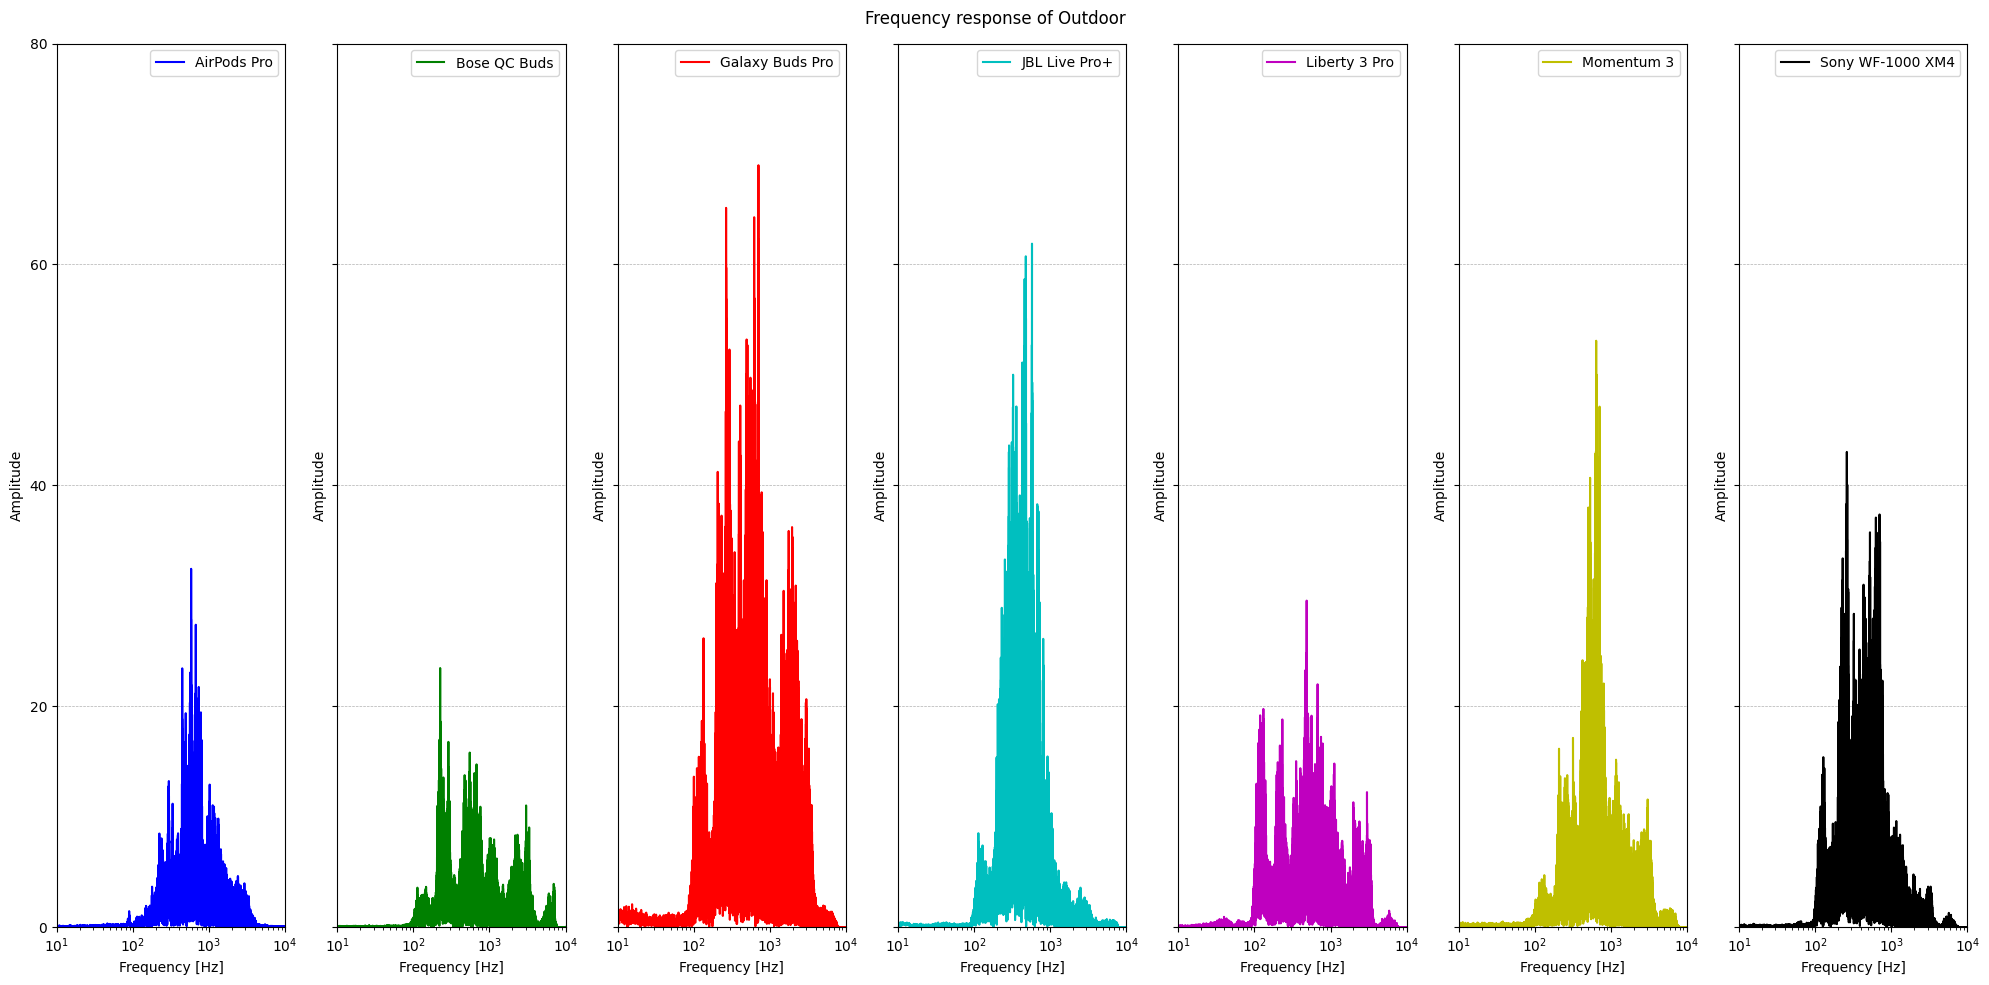

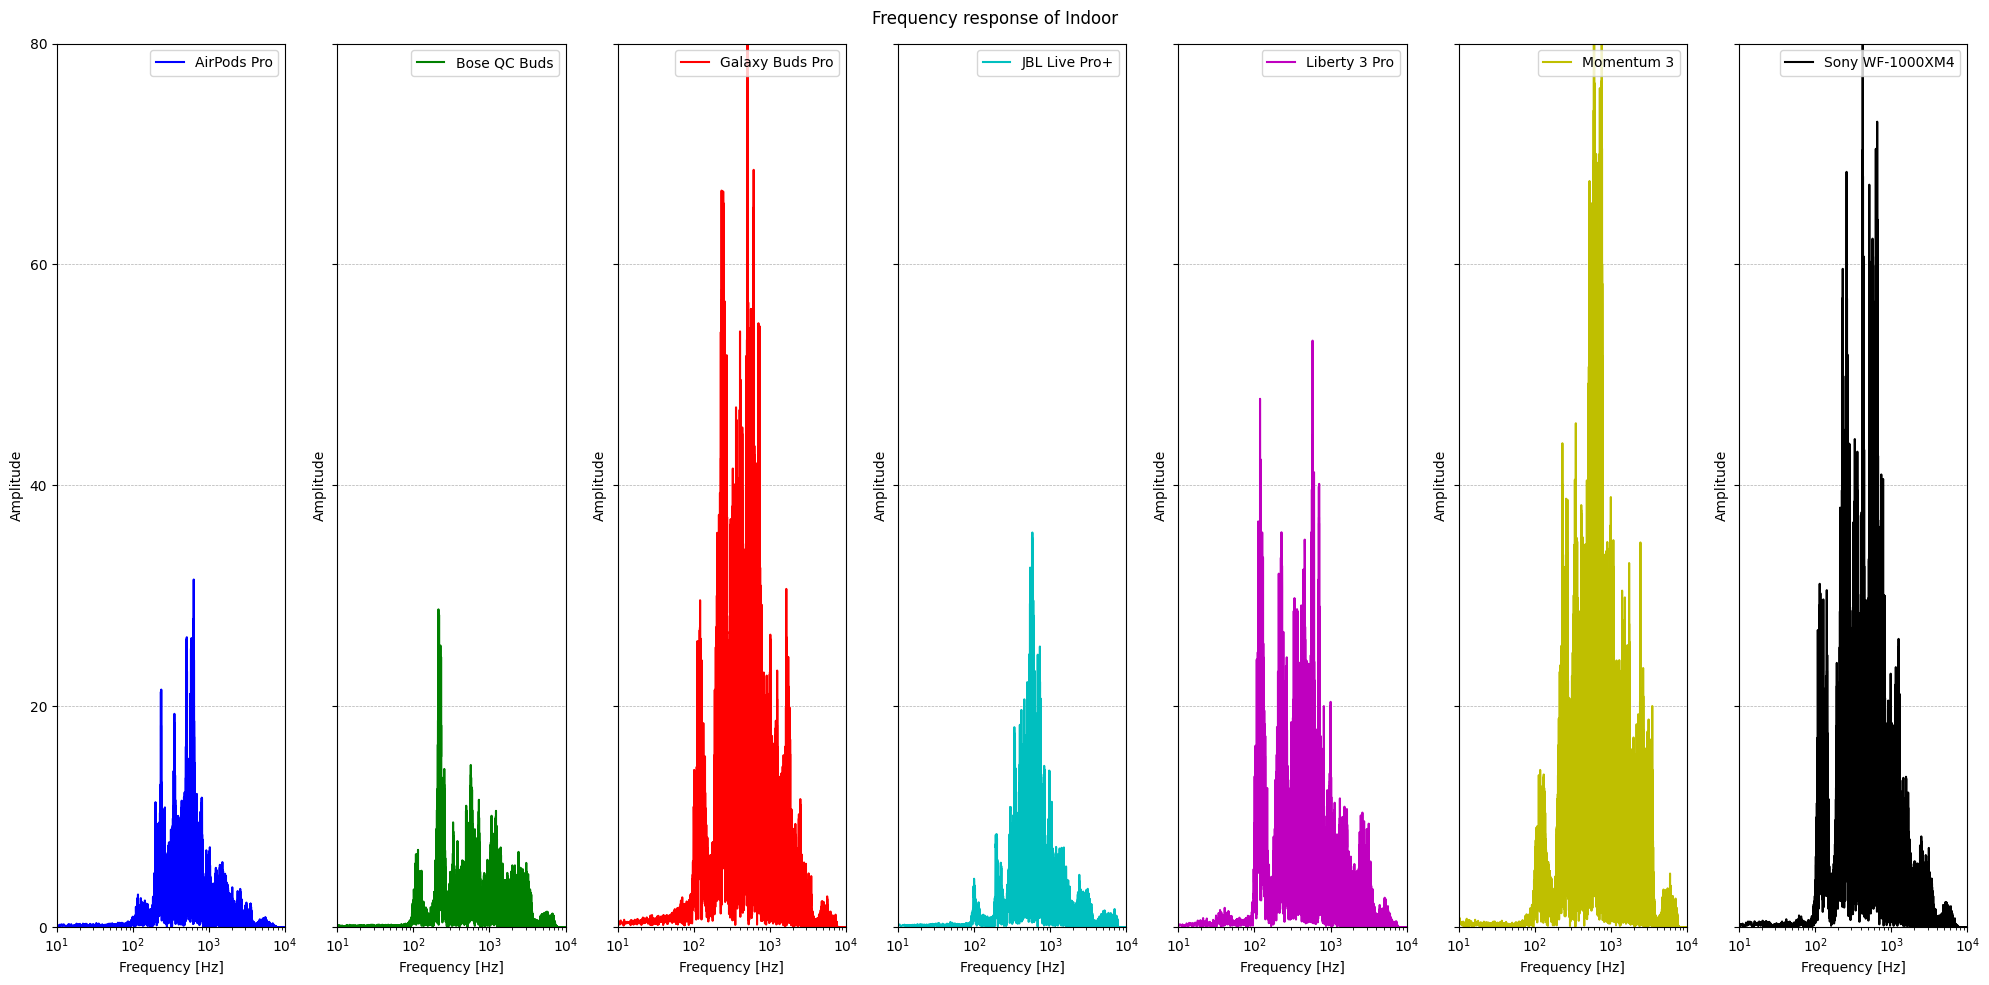

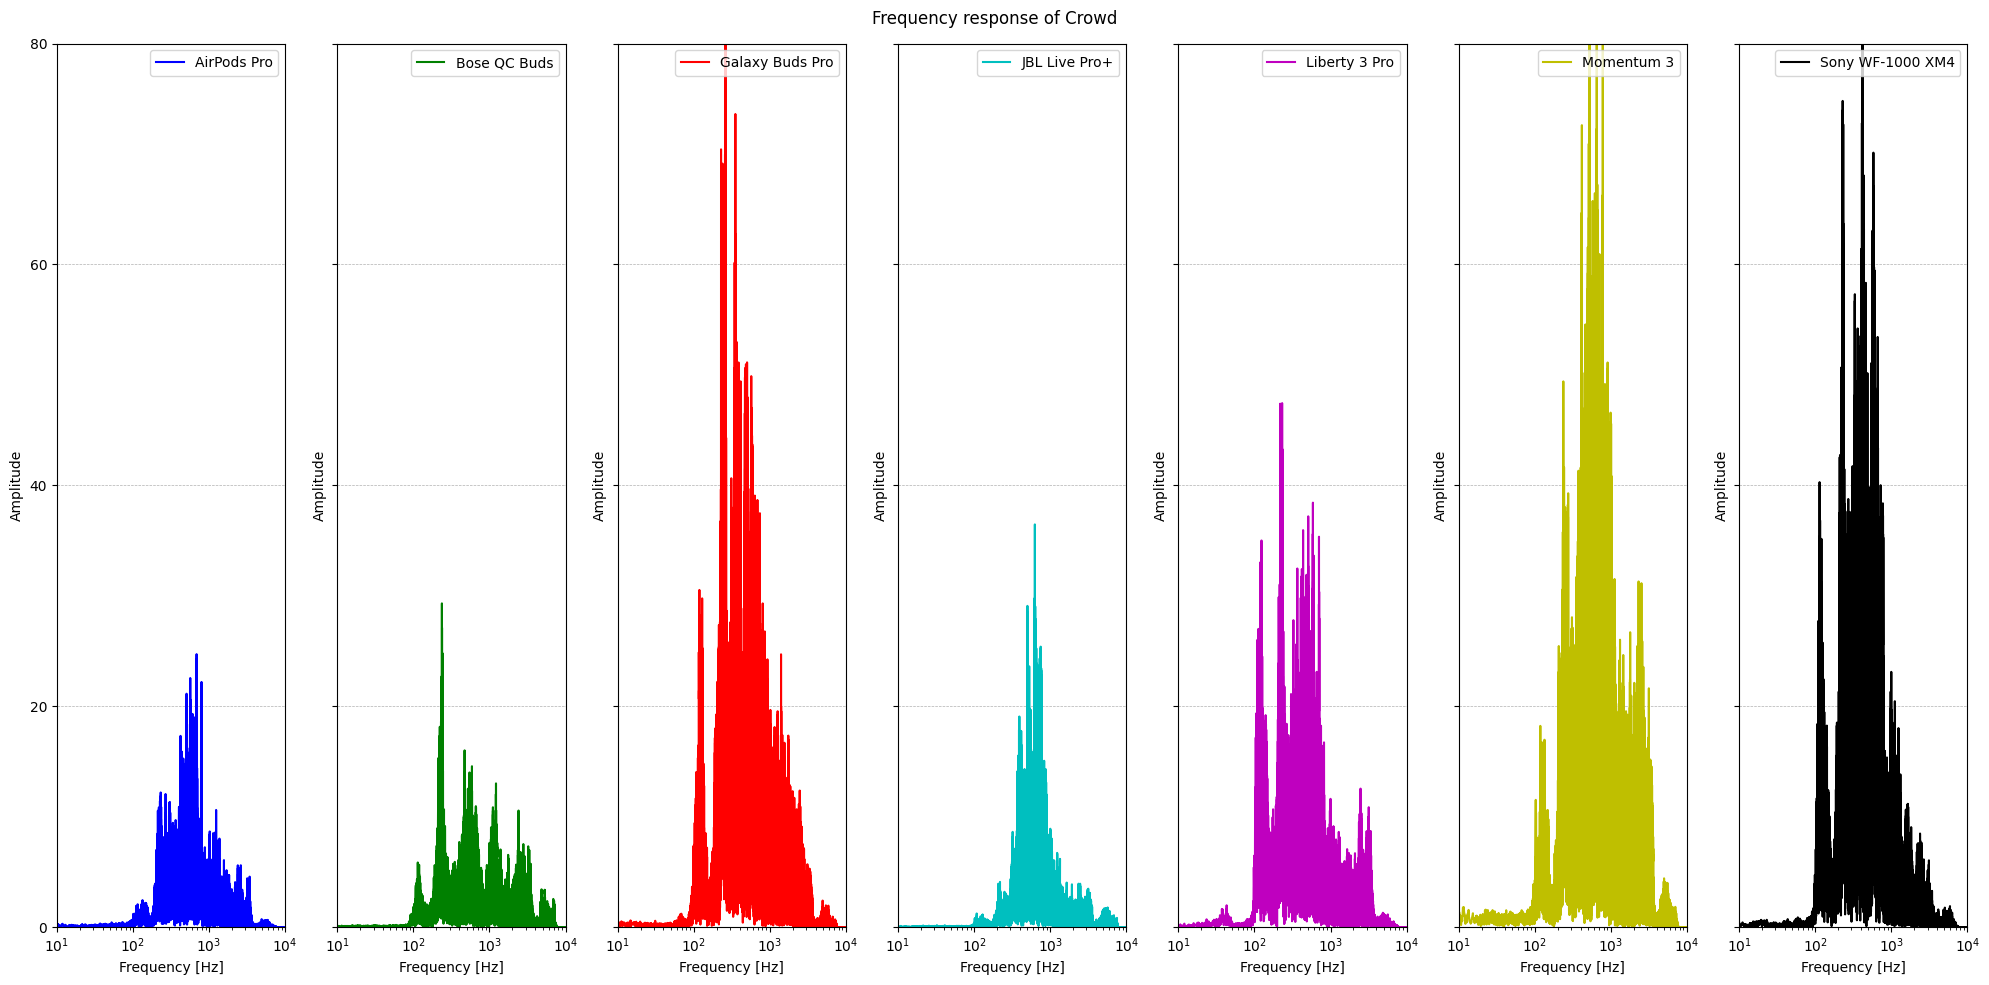

In [73]:
# Loop through each test setting
for test_setting, headphones in data.items():
    # Initialize a new figure and axes for the test setting
    fig, axs = plt.subplots(nrows=1, ncols=7, sharey=True, figsize=(20, 10))

    # Sort headphone names
    sorted_headphones = sorted(headphones.items(), key=lambda x: x[0])

    # Loop through each headphone in the test setting
    for idx, (headphone, (frequencies, amplitudes)) in enumerate(sorted_headphones):
        # Determine the subplot row and column
        col = idx % 7

        # Plot the frequency response data on the figure and add a legend for the headphone
        axs[col].plot(frequencies, amplitudes, label=headphone, color=colors[idx])
        axs[col].legend()
        axs[col].set_xscale('log')  # Set x-axis to logarithmic scale
        axs[col].set_xlim([10**1, 10**4])  # Set x-axis limits
        axs[col].set_ylim([0, 80])  # Set y-axis limits
        axs[col].set_yticks(range(0, 81, 20))  # Set y-axis ticks at 20 intervals
        axs[col].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)  # Add dotted grid lines at y-axis ticks

    # Set the title, labels, and legend
    fig.suptitle(f'Frequency response of {test_setting}')
    for ax in axs.flat:
        ax.set_xlabel('Frequency [Hz]')
        ax.set_ylabel('Amplitude')

    # Show the plot
    plt.tight_layout()
    plt.show()